In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def get_ellipse(img):
    img2 = img.copy()
    img = cv2.blur(img,ksize=(5,5))
    
    img_rect = cv2.rectangle(img, (0,0),(43,62),(0,0,0),-1)
    center_coordinates = (int(img.shape[1] / 2), int(img.shape[0] / 2))
    axesLength = (int(img.shape[0] / 2), int(img.shape[1] / 2))
    center_coordinates = (int(img.shape[1] / 2), int(img.shape[0] / 2))
    axesLength = (int(img.shape[0] / 2), int(img.shape[1] / 2))
    
    angle = 90
    startAngle = 0
    endAngle = 360

    thickness = -1
    image3 = cv2.ellipse(img.copy(), center_coordinates, axesLength, angle, startAngle, endAngle, (255,255,255), -1)
    
    img_1 = cv2.bitwise_or(img_rect.copy(), image3)
    img_final = cv2.bitwise_and(img_1,img2)
#     plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
    return img_final

In [4]:
img_bgr = cv2.imread(r'C:\Users\Agnext-Arfin\Documents\GitHub\20210816_121545_test30_R.bmp')
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

In [5]:
img_hsv = cv2.blur(img_hsv, ksize=(5,5))

In [6]:
img_hsv.shape

(547, 633, 3)

In [7]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [8]:
top = int(0.05 * img_hsv.shape[0])
bottom = top
left = int(0.05 * img_hsv.shape[1])
right = left
img_hsv = cv2.copyMakeBorder(img_hsv, top, bottom, left, right, cv2.BORDER_CONSTANT, None, (0,255,255))

In [9]:
Lower1 = (0, 0, 210)         
Upper1 = (179, 255, 255)
Mask = cv2.inRange(img_hsv, Lower1, Upper1)
kernel = np.ones((3, 3), np.uint8)
Mask = cv2.dilate(Mask, kernel, iterations=1)

mask = Mask.copy()
mask = mask.astype(np.uint8) * 255
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=1)
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations=1)
images, cnt, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

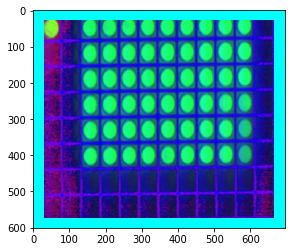

In [10]:
plt.imshow(img_hsv)

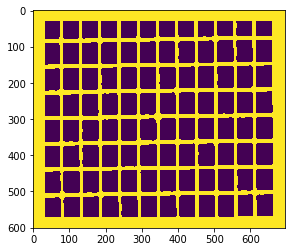

In [11]:
plt.imshow(mask)

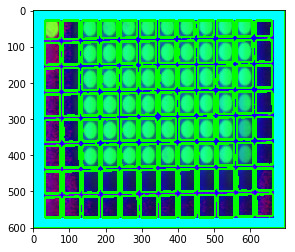

In [12]:
cnt_image = cv2.drawContours(img_hsv.copy(), cnt, -1, (0, 255, 0), 5)
plt.imshow(cnt_image)

In [13]:
output_path = 'out'
if not os.path.exists(output_path):
  os.makedirs(output_path)

for i in range(len(cnt)):
    if hierarchy[0][i][3] ==0:
        x, y, w, h = cv2.boundingRect(cnt[i])
        img = cv2.cvtColor(img_hsv.copy()[y:y+h,x:x+w], cv2.COLOR_HSV2BGR)
        if (img[:,:,0]<65).any():
            ellipse_img = get_ellipse(img)
            cv2.imwrite(output_path + '/img_{}.jpg'.format(i),ellipse_img)
            i += 1

# Research section

In [25]:
# for i in range(len(cnt)):
#     if hierarchy[0][i][3] ==0:
#     # get the bounding rect
#         x, y, w, h = cv2.boundingRect(cnt[i])
#         # to save the images
#         res = cv2.cvtColor(img_hsv.copy()[y:y+h,x:x+w], cv2.COLOR_HSV2BGR)
#         res = cv2.medianBlur(res,5)
# #         plt.imshow(res)
#         break

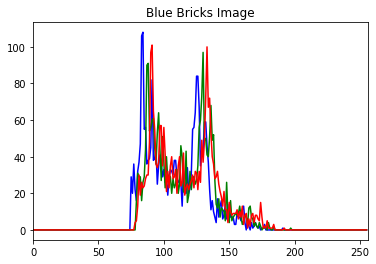

In [26]:
color = ('b','g','r') 
for i,col in enumerate(color):
    histr = cv2.calcHist([res],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

now will build countour image wise

In [12]:
def get_ellipse(img):
    img2 = img.copy()
    img = cv2.blur(img,ksize=(5,5))
    
    img_rect = cv2.rectangle(img, (0,0),(43,62),(0,0,0),-1)
    center_coordinates = (int(img.shape[1] / 2), int(img.shape[0] / 2))
    axesLength = (int(img.shape[0] / 2), int(img.shape[1] / 2))
    center_coordinates = (int(img.shape[1] / 2), int(img.shape[0] / 2))
    axesLength = (int(img.shape[0] / 2), int(img.shape[1] / 2))
    
    angle = 90
    startAngle = 0
    endAngle = 360

    thickness = -1
    image3 = cv2.ellipse(img.copy(), center_coordinates, axesLength, angle, startAngle, endAngle, (255,255,255), -1)
    
    img_1 = cv2.bitwise_or(img_rect.copy(), image3)
    img_final = cv2.bitwise_and(img_1,img2)
#     plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
    return img_final

In [4]:
img = cv2.imread('/home/arfin/Music/out/img_13.jpg')
img2 = img.copy()
# img = cv2.medianBlur(img,5)
img = cv2.blur(img,ksize=(5,5))
# img_gray = cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)
# img_hsv = cv2.cvtColor(img_blur,cv2.COLOR_BGR2HSV)
# edges = cv2.Canny(image=img, threshold1=70, threshold2=70)
# img2 = cv2.GaussianBlur(img2,(5,5),10)

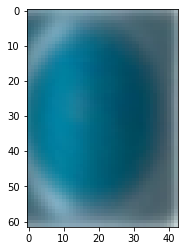

In [5]:
plt.imshow(img2)

In [6]:
img.shape

(62, 43, 3)

In [7]:
img_rect = cv2.rectangle(img, (0,0),(43,62),(0,0,0),-1)
center_coordinates = (int(img.shape[1] / 2), int(img.shape[0] / 2))
axesLength = (int(img.shape[0] / 2), int(img.shape[1] / 2))

center_coordinates = (int(img.shape[1] / 2), int(img.shape[0] / 2))
axesLength = (int(img.shape[0] / 2), int(img.shape[1] / 2))
  
angle = 90
startAngle = 0
endAngle = 360
   
# Line thickness of -1 px
thickness = -1
image3 = cv2.ellipse(img.copy(), center_coordinates, axesLength, angle, startAngle, endAngle, (255,255,255), -1)

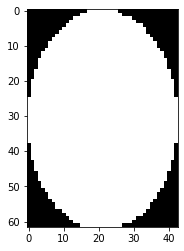

In [8]:
img_1 = cv2.bitwise_or(img_rect.copy(), image3)
plt.imshow(img_1)
img_final = cv2.bitwise_and(img_1,img2)

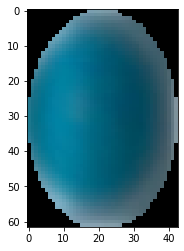

In [9]:
plt.imshow(img_final)
# plt.imshow()

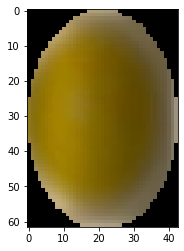

In [10]:
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))

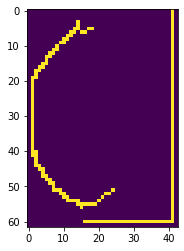

In [26]:
med_val = np.median(img) 
lower = int(max(0, 0.7* med_val))
upper = int(min(255,1.3 * med_val))
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper+50)
plt.imshow(edges)

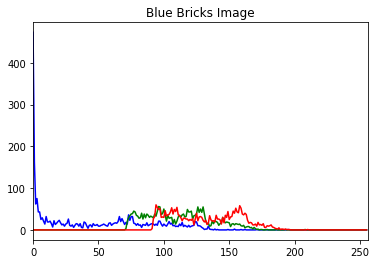

In [27]:
color = ('b','g','r') 
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

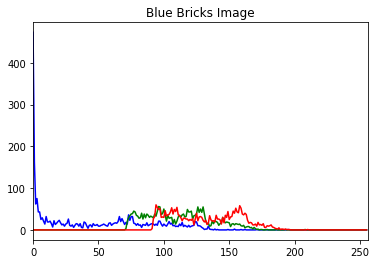

In [28]:
color = ('b','g','r') 
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

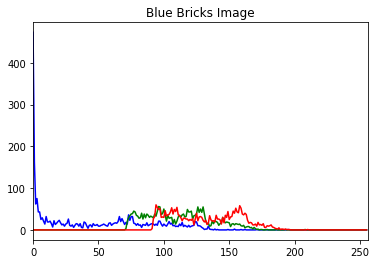

In [29]:
color = ('b','g','r') 
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

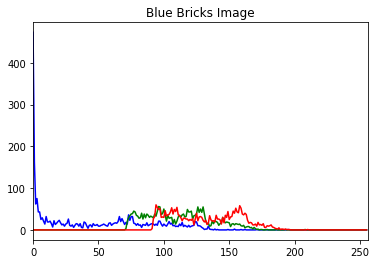

In [30]:
color = ('b','g','r') 
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

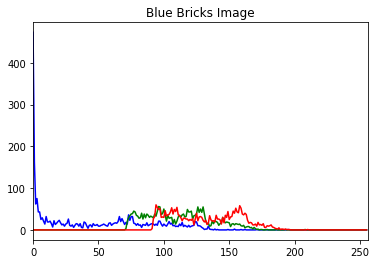

In [31]:
color = ('b','g','r') 
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

In [32]:
img[:,:,0]<60

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [271]:
imgr = cv2.equalizeHist(img) 

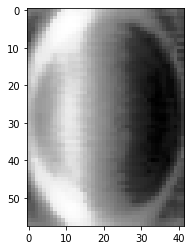

In [273]:
plt.imshow(imgr, cmap='gray')

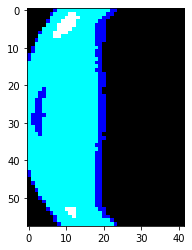

In [284]:
th, im_th = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
plt.imshow(im_th, cmap='gray')

In [89]:
mask_s = mask.astype(np.uint8) * 255
mask_s = cv2.morphologyEx(mask_s, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2)), iterations=5)
image, cnt_s, _ = cv2.findContours(mask_s, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [90]:
cnt_s

[]

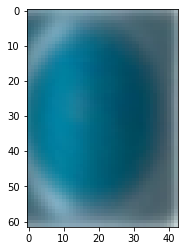

In [87]:
cnt_image_s = cv2.drawContours(img.copy(), cnt_s, -1, (255, 0, 0), 1)
plt.imshow(cnt_image_s)

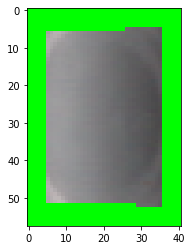

In [158]:
cnt_image = cv2.drawContours(blank_image_rgb.copy(), cnt_s, -1, (0, 255, 0), 5)
plt.imshow(cnt_image)

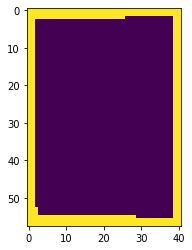

In [159]:
plt.imshow(blank_image_1)

In [149]:
import glob
i=0
for file in glob.glob("/home/arfin/Music/out/*"):
    img = cv2.imread(file)
    mask = cv2.inRange(img, (0, 40, 0), (55, 255,255))
    
    if np.sum(mask) >0:
        cv2.imwrite('out1/img_{}.jpg'.format(i), img)
        i += 1
        
